# Imports and setting up viz

NB : conda env1 on PC, lam1env on spirit (Python3.12)

In [94]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *
from tools_hf import *
from tools_native import *
from tools_LIAISE import *

# sys.path.append('../../python_tools/aborella/PLOTS/')
# from datasets import *
sys.path.append('../../python_tools/aborella/UTIL/')
import xr_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
psy.rcParams['auto_show'] = True
mpl.rcParams['figure.figsize'] = [10., 8.]

# Load model files and edit datasets

LAM output analysis.

Simu irr et simu no-irr.

In [96]:
# nat_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/hourly_native'
nat_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/halfhour_native'

## LMDZ

In [232]:
def format_lmdz_HF(filename, color, name):
    ds = xr.open_mfdataset(filename)
    ds = ds.rename({'time_counter':'time'})
    ds = ds.assign_coords(time_decimal=ds.time.dt.hour + ds.time.dt.minute / 60)
    ds.attrs['name'] = name
    ds.attrs['plot_color']=color

    ds['sens']=-ds['sens']
    ds['flat']=-ds['flat']

    ds['ground_level'] = ds['phis'] / 9.81
    ds['ground_level'].attrs['units'] = 'm'

    ds=add_wind_speed(ds)
    ds=add_wind_direction(ds)
    ds=add_wind_10m(ds)
    # ds=add_relative_humidity(ds)

    #make ovap unit g/kg
    ds['ovap'] = ds['ovap']*1000
    ds['ovap'].attrs['units'] = 'g/kg'
    ds['ovap'].attrs['long_name'] = 'Specific humidity'
    #same for q2m
    ds['q2m'] = ds['q2m']*1000
    ds['q2m'].attrs['units'] = 'g/kg'
    #turn psol to hPa
    ds['psol'] = ds['psol']/100
    ds['psol'].attrs['units'] = 'hPa'
    #make precip unit mm/30mn (like obs)
    ds['precip']=ds['precip'] * 60 * 30
    ds['precip'].attrs['long_name'] = 'Total precipitation'
    ds['precip'].attrs['units']='mm (over 30mn)'

    ds['SWdn_diff'] = ds['SWdnSFCclr'] - ds['SWdnSFC']
    ds['SWdn_diff'].attrs['units'] = 'W/m2'

    
    return ds

In [233]:
lmdz_noirr_file = '{}/sim267_20210701_20210731_HF_histhf.nc'.format(nat_dir)
lmdz_noirr = format_lmdz_HF(lmdz_noirr_file, 'red', 'noirr')
lmdz_noirr

<xarray.Dataset>
Dimensions:               (cell: 9241, nvertex: 6, presnivs: 79, time: 1488,
                           axis_nbounds: 2)
Coordinates:
    lat                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    lon                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1488,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2021-07-01T00:15:00 ... 2021-...
    time_instant          (time) datetime64[ns] dask.array<chunksize=(1488,), meta=np.ndarray>
    time_decimal          (time) float64 0.25 0.75 1.25 ... 22.75 23.25 23.75
Dimensions without coordinates: cell, nvertex, axis_nbounds
Data variables: (12/60)
    bounds_lon            (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    bounds_lat            (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    phis                  (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    ...                    ...
    ground_level          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    wind_speed            (time, presnivs, cell) float32 dask.array<chunksize=(1488, 79, 9241), meta=np.ndarray>
    wind_direction        (time, presnivs, cell) float32 dask.array<chunksize=(1488, 79, 9241), meta=np.ndarray>
    wind_speed_10m        (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    wind_direction_10m    (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    SWdn_diff             (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
Attributes:
    name:         noirr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-12 15:55:58 GMT
    uuid:         ee437f44-3a58-4d21-ba9a-01fe07f3a02a
    plot_color:   red

In [234]:
lmdz_irr_file = '{}/sim268_20210701_20210731_HF_histhf.nc'.format(nat_dir)
lmdz_irr = format_lmdz_HF(lmdz_irr_file, 'blue', 'irr')
lmdz_irr

<xarray.Dataset>
Dimensions:               (cell: 9241, nvertex: 6, presnivs: 79, time: 1488,
                           axis_nbounds: 2)
Coordinates:
    lat                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    lon                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1488,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2021-07-01T00:15:00 ... 2021-...
    time_instant          (time) datetime64[ns] dask.array<chunksize=(1488,), meta=np.ndarray>
    time_decimal          (time) float64 0.25 0.75 1.25 ... 22.75 23.25 23.75
Dimensions without coordinates: cell, nvertex, axis_nbounds
Data variables: (12/60)
    bounds_lon            (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    bounds_lat            (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    phis                  (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    ...                    ...
    ground_level          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    wind_speed            (time, presnivs, cell) float32 dask.array<chunksize=(1488, 79, 9241), meta=np.ndarray>
    wind_direction        (time, presnivs, cell) float32 dask.array<chunksize=(1488, 79, 9241), meta=np.ndarray>
    wind_speed_10m        (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    wind_direction_10m    (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    SWdn_diff             (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-12 15:56:53 GMT
    uuid:         bf2c421f-c71e-4b58-9041-67385349d379
    plot_color:   blue

## ORCHIDEE

In [235]:
def format_ORC_HF(filename, color, name):
    ds = xr.open_mfdataset(filename)
    ds = ds.rename({'time_counter':'time'})
    ds = ds.assign_coords(time_decimal=ds.time.dt.hour + ds.time.dt.minute / 60)
    ds.attrs['name'] = name
    ds.attrs['plot_color']= color
    # ds = ds.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

    ds['evapot']=ds['evapot'] * 3600 * 24
    ds['evapot'].attrs['units'] = 'mm/d'

    ds['soil_temp_01'] = ds['ptn'][:,3,:] - 273.15
    ds['soil_temp_01'].attrs['units'] = '°C'
    ds['soil_temp_01'].attrs['long_name'] = 'Soil temperature at 1.3cm'
    ds['soil_temp_03'] = ds['ptn'][:,4,:] - 273.15
    ds['soil_temp_03'].attrs['units'] = '°C'
    ds['soil_temp_03'].attrs['long_name'] = 'Soil temperature at 2.9cm'
    ds['soil_temp_06'] = ds['ptn'][:,5,:] - 273.15
    ds['soil_temp_06'].attrs['units'] = '°C'
    ds['soil_temp_06'].attrs['long_name'] = 'Soil temperature at 6.06cm'
    ds['soil_temp_12'] = ds['ptn'][:,6,:] - 273.15
    ds['soil_temp_12'].attrs['units'] = '°C'
    ds['soil_temp_12'].attrs['long_name'] = 'Soil temperature at 12.3cm'

    return ds

In [236]:
orc_noirr_file = '{}/sim267_20210701_20210731_HF_sechiba_out_2.nc'.format(nat_dir)
orc_noirr = format_ORC_HF(orc_noirr_file, 'red', 'noirr')
orc_noirr

<xarray.Dataset>
Dimensions:               (cell: 9241, nvertex: 6, veget: 15, solth: 18,
                           time: 1488, axis_nbounds: 2)
Coordinates:
    lat                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    lon                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
  * veget                 (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * solth                 (solth) float32 0.0004888 0.001955 ... 33.53 65.56
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1488,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2021-07-01T00:15:00 ... 2021-...
    time_decimal          (time) float64 0.25 0.75 1.25 ... 22.75 23.25 23.75
Dimensions without coordinates: cell, nvertex, axis_nbounds
Data variables: (12/34)
    bounds_lon            (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    bounds_lat            (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    Areas                 (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    Contfrac              (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    ...                    ...
    LAImean               (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    vegetfrac             (time, veget, cell) float32 dask.array<chunksize=(1488, 15, 9241), meta=np.ndarray>
    soil_temp_01          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    soil_temp_03          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    soil_temp_06          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    soil_temp_12          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
Attributes:
    name:         noirr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-12 15:55:58 GMT
    uuid:         0da80c4f-0b9a-4c5f-9d7f-abd1c2f5908a
    plot_color:   red

In [237]:
orc_irr_file =  '{}/sim268_20210701_20210731_HF_sechiba_out_2.nc'.format(nat_dir)
orc_irr = format_ORC_HF(orc_irr_file, 'blue', 'irr')
orc_irr

<xarray.Dataset>
Dimensions:               (cell: 9241, nvertex: 6, veget: 15, solth: 18,
                           time: 1488, axis_nbounds: 2)
Coordinates:
    lat                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    lon                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
  * veget                 (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * solth                 (solth) float32 0.0004888 0.001955 ... 33.53 65.56
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1488,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2021-07-01T00:15:00 ... 2021-...
    time_decimal          (time) float64 0.25 0.75 1.25 ... 22.75 23.25 23.75
Dimensions without coordinates: cell, nvertex, axis_nbounds
Data variables: (12/34)
    bounds_lon            (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    bounds_lat            (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1488, 2), meta=np.ndarray>
    Areas                 (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    Contfrac              (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    ...                    ...
    LAImean               (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    vegetfrac             (time, veget, cell) float32 dask.array<chunksize=(1488, 15, 9241), meta=np.ndarray>
    soil_temp_01          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    soil_temp_03          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    soil_temp_06          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
    soil_temp_12          (time, cell) float32 dask.array<chunksize=(1488, 9241), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-12 15:56:53 GMT
    uuid:         23d792f3-a907-4a28-8b98-4a26dbdc8a19
    plot_color:   blue

## Selecting subdatasets

### LIAISE sites

In [238]:
#on grid cell
#highirr
Cendrosa_lon=0.755
Cendrosa_lat=41.63
#lowirr
ElsPlans_lon=0.996
ElsPlans_lat=41.51

# alt for these grid cells : (307.6005859375, 456.8945007324219)

In [289]:
#actual data from LIAISE db
Cendrosa_Latitude=41.69336
Cendrosa_Longitude=0.928538
Cendrosa_altitude= 240

ElsPlans_Latitude = 41.590111
ElsPlans_Longitude = 1.029363
ElsPlans_altitude = 334

In [240]:
cen_lmdz_noirr = sel_closest(lmdz_noirr, Cendrosa_lon, Cendrosa_lat)
cen_lmdz_irr = sel_closest(lmdz_irr, lon=Cendrosa_lon,lat=Cendrosa_lat)
cen_orc_noirr = sel_closest(orc_noirr, lon=Cendrosa_lon,lat=Cendrosa_lat)
cen_orc_irr = sel_closest(orc_irr, lon=Cendrosa_lon,lat=Cendrosa_lat)
cen_lmdz_noirr.attrs['name']='La Cendrosa no_irr'
cen_lmdz_irr.attrs['name']='La Cendrosa irr'
cen_orc_noirr.attrs['name']='La Cendrosa no_irr'
cen_orc_irr.attrs['name']='La Cendrosa irr'

In [241]:
els_lmdz_noirr = sel_closest(lmdz_noirr, lon=ElsPlans_lon,lat=ElsPlans_lat)
els_lmdz_irr   = sel_closest(lmdz_irr, lon=ElsPlans_lon,lat=ElsPlans_lat)
els_orc_noirr  = sel_closest(orc_noirr, lon=ElsPlans_lon,lat=ElsPlans_lat)
els_orc_irr    = sel_closest(orc_irr, lon=ElsPlans_lon,lat=ElsPlans_lat)
els_lmdz_irr.attrs['name']='Els Plans irr'
els_orc_noirr.attrs['name']='Els Plans no_irr'
els_lmdz_noirr.attrs['name']='Els Plans no_irr'
els_orc_irr.attrs['name']='Els Plans irr'

In [242]:
#add attr linestyle -- to els_ datasets
els_lmdz_noirr.attrs['linestyle']='--'
els_lmdz_irr.attrs['linestyle']='--'
els_orc_noirr.attrs['linestyle']='--'
els_orc_irr.attrs['linestyle']='--'
#add attr linestyle - to cen_ datasets
cen_lmdz_noirr.attrs['linestyle']='-'
cen_lmdz_irr.attrs['linestyle']='-'
cen_orc_noirr.attrs['linestyle']='-'
cen_orc_irr.attrs['linestyle']='-'

In [243]:
cendrosa_gl= cen_lmdz_noirr['ground_level'].mean(dim='time').values.item()
elsplans_gl= els_lmdz_noirr['ground_level'].mean(dim='time').values.item()
cendrosa_gl,  elsplans_gl

(307.6005859375, 456.8945007324219)

In [244]:
def add_var_on_mast_level(ds: xr.Dataset, var: str, height:int, newvar_name: str, unit: str, longname: str) -> xr.Dataset:
    # Compute closest index to height
    closest_idx = np.abs(ds["geoph"] - ds['ground_level'] - height).argmin(dim="presnivs").compute()

    # Assign new variable with proper metadata
    ds[newvar_name] = ds[var].isel(presnivs=closest_idx)
    ds[newvar_name].attrs.update({"long_name" : longname, "units": unit})
    
    return ds

In [245]:
mast_temps=True
mast_temps=False

mast_q=True
mast_q=False

mast_rh=True
mast_rh=False

mast_fluxes=True
mast_fluxes=False

In [246]:
if mast_temps:
    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'temp', 10, 't10m', 'K', 'Temperature at 10m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'temp', 10, 't10m', 'K', 'Temperature at 10m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'temp', 10, 't10m', 'K', 'Temperature at 10m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'temp', 10, 't10m', 'K', 'Temperature at 10m')

    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'temp', 25, 't25m', 'K', 'Temperature at 25m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'temp', 25, 't25m', 'K', 'Temperature at 25m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'temp', 25, 't25m', 'K', 'Temperature at 25m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'temp', 25, 't25m', 'K', 'Temperature at 25m')

    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'temp', 50, 't50m', 'K', 'Temperature at 50m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'temp', 50, 't50m', 'K', 'Temperature at 50m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'temp', 50, 't50m', 'K', 'Temperature at 50m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'temp', 50, 't50m', 'K', 'Temperature at 50m')

In [247]:
if mast_q:
    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'ovap', 10, 'q10m', 'g/kg', 'q at 10m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'ovap', 10, 'q10m', 'g/kg', 'q at 10m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'ovap', 10, 'q10m', 'g/kg', 'q at 10m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'ovap', 10, 'q10m', 'g/kg', 'q at 10m')
    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'ovap', 25, 'q25m', 'g/kg', 'q at 25m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'ovap', 25, 'q25m', 'g/kg', 'q at 25m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'ovap', 25, 'q25m', 'g/kg', 'q at 25m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'ovap', 25, 'q25m', 'g/kg', 'q at 25m')
    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'ovap', 50, 'q50m', 'g/kg', 'q at 50m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'ovap', 50, 'q50m', 'g/kg', 'q at 50m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'ovap', 50, 'q50m', 'g/kg', 'q at 50m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'ovap', 50, 'q50m', 'g/kg', 'q at 50m')

In [248]:
if mast_rh:
    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'rh', 10, 'rh10m', '%', 'rh at 10m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'rh', 10, 'rh10m', '%', 'rh at 10m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'rh', 10, 'rh10m', '%', 'rh at 10m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'rh', 10, 'rh10m', '%', 'rh at 10m')
    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'rh', 25, 'rh25m', '%', 'rh at 25m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'rh', 25, 'rh25m', '%', 'rh at 25m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'rh', 25, 'rh25m', '%', 'rh at 25m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'rh', 25, 'rh25m', '%', 'rh at 25m')
    cen_lmdz_noirr = add_var_on_mast_level(cen_lmdz_noirr, 'rh', 50, 'rh50m', '%', 'rh at 50m')
    cen_lmdz_irr   = add_var_on_mast_level(cen_lmdz_irr,   'rh', 50, 'rh50m', '%', 'rh at 50m')
    els_lmdz_noirr = add_var_on_mast_level(els_lmdz_noirr, 'rh', 50, 'rh50m', '%', 'rh at 50m')
    els_lmdz_irr   = add_var_on_mast_level(els_lmdz_irr,   'rh', 50, 'rh50m', '%', 'rh at 50m')

### SOP/IOP days

In [249]:
day_start_times=[day1_start_time, day2_start_time, day3_start_time, day4_start_time, day5_start_time, day6_start_time, day7_start_time]
day_end_times  =[day1_end_time, day2_end_time, day3_end_time, day4_end_time, day5_end_time, day6_end_time, day7_end_time]

In [250]:
sop_cen_lmdz_noirr = filter_xarray_by_timestamps(cen_lmdz_noirr, SOP_start_time, SOP_end_time)
sop_cen_lmdz_irr = filter_xarray_by_timestamps(cen_lmdz_irr, SOP_start_time, SOP_end_time)
sop_cen_orc_noirr = filter_xarray_by_timestamps(cen_orc_noirr, SOP_start_time, SOP_end_time)
sop_cen_orc_irr = filter_xarray_by_timestamps(cen_orc_irr, SOP_start_time, SOP_end_time)

sop_els_lmdz_noirr = filter_xarray_by_timestamps(els_lmdz_noirr, SOP_start_time, SOP_end_time)
sop_els_lmdz_irr = filter_xarray_by_timestamps(els_lmdz_irr, SOP_start_time, SOP_end_time)
sop_els_orc_noirr = filter_xarray_by_timestamps(els_orc_noirr, SOP_start_time, SOP_end_time)
sop_els_orc_irr = filter_xarray_by_timestamps(els_orc_irr, SOP_start_time, SOP_end_time)

In [251]:
iop_cen_lmdz_noirr = {}
iop_cen_lmdz_irr = {}
iop_cen_orc_noirr = {}
iop_cen_orc_irr = {}
iop_els_lmdz_noirr = {}
iop_els_lmdz_irr = {}
iop_els_orc_noirr = {}
iop_els_orc_irr = {}
for i,day in enumerate(RS_days_list):
    iop_cen_lmdz_noirr[day] = filter_xarray_by_timestamps(cen_lmdz_noirr, day_start_times[i], day_end_times[i])
    iop_cen_lmdz_irr[day] = filter_xarray_by_timestamps(cen_lmdz_irr, day_start_times[i], day_end_times[i])
    iop_cen_orc_noirr[day] = filter_xarray_by_timestamps(cen_orc_noirr, day_start_times[i], day_end_times[i])
    iop_cen_orc_irr[day] = filter_xarray_by_timestamps(cen_orc_irr, day_start_times[i], day_end_times[i])

    iop_els_lmdz_noirr[day] = filter_xarray_by_timestamps(els_lmdz_noirr, day_start_times[i], day_end_times[i])
    iop_els_lmdz_irr[day] = filter_xarray_by_timestamps(els_lmdz_irr, day_start_times[i], day_end_times[i])
    iop_els_orc_noirr[day] = filter_xarray_by_timestamps(els_orc_noirr, day_start_times[i], day_end_times[i])
    iop_els_orc_irr[day] = filter_xarray_by_timestamps(els_orc_irr, day_start_times[i], day_end_times[i])

## Monthly files for July 2021

In [252]:
lmdz_noirr_1M_file = '{}/sim267_20210701_20210731_1M_histmth.nc'.format(nat_dir)
lmdz_noirr_1M = format_lmdz_HF(lmdz_noirr_1M_file, 'red', 'noirr')

lmdz_irr_1M_file = '{}/sim268_20210701_20210731_1M_histmth.nc'.format(nat_dir)
lmdz_irr_1M = format_lmdz_HF(lmdz_irr_1M_file, 'blue', 'irr')

lmdz_irr_1M

KeyError: 'SWdnSFCclr'

In [ ]:
orc_noirr_1M_file =  '{}/sim267_20210701_20210731_1M_sechiba_history.nc'.format(nat_dir)
orc_noirr_1M = format_ORC_HF(orc_noirr_1M_file, 'red', 'noirr')

orc_irr_1M_file =  '{}/sim268_20210701_20210731_1M_sechiba_history.nc'.format(nat_dir)
orc_irr_1M = format_ORC_HF(orc_irr_1M_file, 'blue', 'irr')
orc_irr_1M['irrig_frac'] = orc_irr_1M['irrigmap_dyn']/orc_irr_1M['Areas'] * 100

orc_noirr_1M

<xarray.Dataset>
Dimensions:                 (cell: 9241, nvertex: 6, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, snowlev: 3,
                             albtyp: 2, time: 1, axis_nbounds: 2)
Coordinates:
    lat                     (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    lon                     (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2021-07-16T12:00:00
    time_decimal            (time) float64 12.0
Dimensions without coordinates: cell, nvertex, axis_nbounds
Data variables: (12/128)
    bounds_lon              (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    bounds_lat              (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    Contfrac                (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    ...                      ...
    delstock_routing_daily  (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soilalb_bg              (albtyp, cell) float32 dask.array<chunksize=(2, 9241), meta=np.ndarray>
    soil_temp_01            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soil_temp_03            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soil_temp_06            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soil_temp_12            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
Attributes:
    name:         noirr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-12 15:55:47 GMT
    uuid:         d4300886-62b9-4c76-b4f0-af6a48aefa89
    plot_color:   red

## Roughdyn=N

In [ ]:
lmdz_noroughdyn_file = '{}/sim269_20210701_20210731_HF_histhf.nc'.format(nat_dir)
lmdz_noroughdyn = format_lmdz_HF(lmdz_noroughdyn_file, 'green', 'noirr_noroughdyn')

orc_noroughdyn_file =  '{}/sim269_20210701_20210731_HF_sechiba_out_2.nc'.format(nat_dir)
orc_noroughdyn = format_ORC_HF(orc_noroughdyn_file, 'green', 'noirr_noroughdyn')

In [ ]:
lmdz_noroughdyn_1M_file = '{}/sim269_20210701_20210731_1M_histmth.nc'.format(nat_dir)
lmdz_noroughdyn_1M = format_lmdz_HF(lmdz_noroughdyn_1M_file, 'green', 'noirr_noroughdyn')

orc_noroughdyn_1M_file =  '{}/sim269_20210701_20210731_1M_sechiba_history.nc'.format(nat_dir)
orc_noroughdyn_1M = format_ORC_HF(orc_noroughdyn_1M_file, 'green', 'noirr_noroughdyn')

orc_noroughdyn_1M

<xarray.Dataset>
Dimensions:                 (cell: 9241, nvertex: 6, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, snowlev: 3,
                             albtyp: 2, time: 1, axis_nbounds: 2)
Coordinates:
    lat                     (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    lon                     (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2021-07-16T12:00:00
    time_decimal            (time) float64 12.0
Dimensions without coordinates: cell, nvertex, axis_nbounds
Data variables: (12/128)
    bounds_lon              (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    bounds_lat              (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    Contfrac                (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    ...                      ...
    delstock_routing_daily  (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soilalb_bg              (albtyp, cell) float32 dask.array<chunksize=(2, 9241), meta=np.ndarray>
    soil_temp_01            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soil_temp_03            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soil_temp_06            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soil_temp_12            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
Attributes:
    name:         noirr_noroughdyn
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-12 16:16:40 GMT
    uuid:         551716da-468f-4860-847e-da236e6f2894
    plot_color:   green

In [ ]:
#select sites and sopn days for nouroughdyn sim
cen_lmdz_noroughdyn = sel_closest(lmdz_noroughdyn, lon=Cendrosa_lon,lat=Cendrosa_lat)
cen_orc_noroughdyn = sel_closest(orc_noroughdyn, lon=Cendrosa_lon,lat=Cendrosa_lat)
els_lmdz_noroughdyn = sel_closest(lmdz_noroughdyn, lon=ElsPlans_lon,lat=ElsPlans_lat)
els_orc_noroughdyn = sel_closest(orc_noroughdyn, lon=ElsPlans_lon,lat=ElsPlans_lat)
cen_lmdz_noroughdyn.attrs['name']='La Cendrosa no_irr_noroughdyn'
cen_orc_noroughdyn.attrs['name']='La Cendrosa no_irr_noroughdyn'
els_lmdz_noroughdyn.attrs['name']='Els Plans no_irr_noroughdyn'
els_orc_noroughdyn.attrs['name']='Els Plans no_irr_noroughdyn'
#add attr linestyle - to nouroughdyn datasets
cen_lmdz_noroughdyn.attrs['linestyle']='-'
cen_orc_noroughdyn.attrs['linestyle']='-'
els_lmdz_noroughdyn.attrs['linestyle']='-'
els_orc_noroughdyn.attrs['linestyle']='-'

sop_cen_lmdz_noroughdyn = filter_xarray_by_timestamps(cen_lmdz_noroughdyn, SOP_start_time, SOP_end_time)
sop_cen_orc_noroughdyn = filter_xarray_by_timestamps(cen_orc_noroughdyn, SOP_start_time, SOP_end_time)
sop_els_lmdz_noroughdyn = filter_xarray_by_timestamps(els_lmdz_noroughdyn, SOP_start_time, SOP_end_time)
sop_els_orc_noroughdyn = filter_xarray_by_timestamps(els_orc_noroughdyn, SOP_start_time, SOP_end_time)

# Load obs files and edit datasets

## RS

In [ ]:
cendrosa_dir='../../../obs/LIAISE/LIAISE_LA-CENDROSA_CNRM_RS_L2'
cen_files_list=[cendrosa_files_1507,cendrosa_files_1607,cendrosa_files_1707,cendrosa_files_2007,cendrosa_files_2107,cendrosa_files_2207,cendrosa_files_2707]
cen_times_list=[cen_1507_times,cen_1607_times,cen_1707_times,cen_2007_times,cen_2107_times,cen_2207_times,cen_2707_times]

els_dir='../../../obs/LIAISE/LIAISE_ELS-PLANS_UKMO_radiosondes_L1'
els_files_list=[els_files_1507,els_files_1607,els_files_1707,els_files_2007,els_files_2107,els_files_2207,els_files_2707]
els_times_list=[els_1507_times,els_1607_times,els_1707_times,els_2007_times,els_2107_times,els_2207_times,els_2707_times]

In [ ]:
cen_RS={}
els_RS={}
for i in range(len(cen_files_list)):
    # print(RS_days_list[i])
    cen_RS_day=RS_extract_full_day(cen_files_list[i], cen_times_list[i], cendrosa_dir, format_Cendrosa_RS)
    els_RS_day=RS_extract_full_day(els_files_list[i], els_times_list[i], els_dir, format_ElsPlans_RS)
    cen_RS[RS_days_list[i]]=cen_RS_day
    els_RS[RS_days_list[i]]=els_RS_day

## Masts measurements

In [ ]:
def format_Cendrosa_MTO(filename):
    ds = xr.open_mfdataset(filename)
    ds = ds.assign_coords(time_decimal=ds.time.dt.hour + ds.time.dt.minute / 60)
    #add name and plot color
    ds.attrs['name'] = 'Cendrosa_MTO'
    ds.attrs['plot_color'] = 'black'
    ds.attrs['linestyle']='-'

    rename_dict = {
        #lmdz vars
        'ta_2':'t2m',
        'shf_1':'sens',
        'lhf_1':'flat',
        'hur_2':'rh2m',
        'hus_2':'q2m',
        'ws_2':'wind_speed_10m',
        'wd_2':'wind_direction_10m',
        'pa':'psol',
        'swup':'SWupSFC',
        'lwup':'LWupSFC',
        'swd':'SWdnSFC',
        'lwd':'LWdnSFC',
        'rain_cumul':'precip',

        'ta_3':'t10m',
        'ta_4':'t25m',
        'ta_5':'t50m',
        'hur_3':'rh10m',
        'hur_4':'rh25m',
        'hur_5':'rh50m',
        'hus_3':'q10m',
        'hus_4':'q25m',
        'hus_5':'q50m',
        'shf_2':'sens25m',
        'shf_3':'sens50m',
        'lhf_2':'flat50m',
        
        #orc vars
        'soil_temp_1':'soil_temp_06',
        'soil_temp_2':'soil_temp_12',
        'soil_heat_flux':'Qg',

    }
    ds = ds.rename(rename_dict)

    #change temperatures to K
    ds['t2m'] = ds['t2m'] + 273.15
    ds['t2m'].attrs['units'] = 'K'
    ds['t10m'] = ds['t10m'] + 273.15
    ds['t10m'].attrs['units'] = 'K'
    ds['t25m'] = ds['t25m'] + 273.15
    ds['t25m'].attrs['units'] = 'K'
    ds['t50m'] = ds['t50m'] + 273.15
    ds['t50m'].attrs['units'] = 'K'
    #change sign of Qg
    ds['Qg'] = -ds['Qg']
    #make netrad fluxes
    ds['lwnet'] = ds['LWdnSFC'] - ds['LWupSFC']
    ds['lwnet'].attrs['units'] = 'W/m2'
    ds['swnet'] = ds['SWdnSFC'] - ds['SWupSFC']
    ds['swnet'].attrs['units'] = 'W/m2'
    #humidity in top10cm
    alpha_SM=0.5
    ds['mrsos']=(alpha_SM * ds['soil_moisture_1'] + (1-alpha_SM) * ds['soil_moisture_2']) * 100
    ds['mrsos'].attrs['units'] = 'mm'

    ds['soil_moisture_1'] = ds['soil_moisture_1'] * 100
    ds['soil_moisture_2'] = ds['soil_moisture_2'] * 100
    ds['soil_moisture_3'] = ds['soil_moisture_3'] * 100

    # #precip in mm/d (initialy in mm/30mn)
    # ds['precip'] = ds['precip'] * 2 * 24
    # ds['precip'].attrs['units'] = 'mm/d'

    return(ds)

In [ ]:
#load all July obs in one ds
cen_mto_filename='../../../obs/LIAISE/LIAISE_LA-CENDROSA_CNRM_MTO-FLUX-30MIN_L2/LIAISE_LA-CENDROSA_CNRM_MTO-FLUX-30MIN_L2_2021-07*_V3.nc'
cen_mto = format_Cendrosa_MTO(cen_mto_filename)
cen_mto

<xarray.Dataset>
Dimensions:                (time: 1488, level: 2)
Coordinates:
  * time                   (time) datetime64[ns] 2021-07-01T00:30:00 ... 2021...
    time_decimal           (time) float64 0.5 1.0 1.5 2.0 ... 22.5 23.0 23.5 0.0
Dimensions without coordinates: level
Data variables: (12/112)
    time_bnds              (time, level) datetime64[ns] dask.array<chunksize=(48, 2), meta=np.ndarray>
    Qg                     (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    precip                 (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    soil_temp_06           (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    soil_temp_12           (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    soil_temp_3            (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    ...                     ...
    w_v_cov_1              (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    w_v_cov_2              (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    w_v_cov_3              (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lwnet                  (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    swnet                  (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    mrsos                  (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
Attributes: (12/36)
    creator_name:              William Maurel
    creator_email:             contact.tramm-cnrm@meteo.fr
    acqid:                     Ce210182
    processing_level:          L2
    nom_aeris:                 LA-CENDROSA
    doi:                       https//doi.org/10.25326/320
    ...                        ...
    geospatial_lon_max:        0.92841
    geospatial_lat_min:        41.69336
    geospatial_lat_max:        41.69336
    name:                      Cendrosa_MTO
    plot_color:                black
    linestyle:                 -

In [ ]:
sop_cen_mto = filter_xarray_by_timestamps(cen_mto, SOP_start_time, SOP_end_time)

In [ ]:
def format_ElsPlans_MTO(ds, start_day):
    #add name and plot color
    ds.attrs['name'] = 'ElsPlans_MTO'
    ds.attrs['plot_color'] = 'black'
    ds.attrs['linestyle']='--'

    rename_dict = {
        'HOUR_time':'time',
        #lmdz vars
        'PRES_subsoil':'psol',
        'TEMP_2m':'t2m',
        'RHUM_2mB':'rh2m',
        'UTOT_10m':'wind_speed_10m',
        'DIR_10m':'wind_direction_10m',
        'SWUP_rad':'SWupSFC',
        'LWUP_rad':'LWupSFC',
        'SWDN_rad':'SWdnSFC',
        'LWDN_rad':'LWdnSFC',
        'RAIN_subsoil' : 'precip',
        'TEMP_50m': 't50m',
        'RHUM_50m': 'rh50m',
        'TEMP_25m': 't25m',
        'RHUM_25m': 'rh25m',
        'TEMP_10m': 't10m',

        #orc vars
        'SFLXA_subsoil':'Qg',
        'ST01_subsoil':'soil_temp_01',
        'ST04_subsoil':'soil_temp_03',
        'ST10_subsoil':'soil_temp_12',
    }
    ds = ds.rename(rename_dict)
    # ds = ds.assign_coords(time_decimal=ds.time.dt.hour + ds.time.dt.minute / 60)

    #convert time to hour:mn:s
    ds['time'] = pd.to_datetime(start_day) + pd.to_timedelta(ds['time'], unit='h')

    #add coord time_decimal for diurnal cycle
    ds = ds.assign_coords(time_decimal=ds['time'].dt.hour + ds['time'].dt.minute / 60)

    #remove all values of 1e11
    ds = ds.where(ds != 1e11)
    # change temperatures to K
    ds['t2m'] = ds['t2m'] + 273.15
    ds['t2m'].attrs['units'] = 'K'
    ds['t10m'] = ds['t10m'] + 273.15
    ds['t10m'].attrs['units'] = 'K'
    ds['t25m'] = ds['t25m'] + 273.15
    ds['t25m'].attrs['units'] = 'K'
    ds['t50m'] = ds['t50m'] + 273.15
    ds['t50m'].attrs['units'] = 'K'
    #get turbulent fluxes
    # Latent heat of vaporization of water in J/kg
    lambda_v = 2.5e6
    ds['flat'] = ds['WQ_2m'] * lambda_v
    ds['flat'].attrs['units'] = 'W/m2'
    # air density in kg/m3 and specific heat capacity of air in J/kg/K
    rho=1.225
    cp=1004.67
    ds['sens'] = ds['WT_2m'] * rho * cp
    ds['sens'].attrs['units'] = 'W/m2'
    # make net rad fluxes
    ds['lwnet'] = ds['LWdnSFC'] - ds['LWupSFC']
    ds['lwnet'].attrs['units'] = 'W/m2'
    ds['swnet'] = ds['SWdnSFC'] - ds['SWupSFC']
    ds['swnet'].attrs['units'] = 'W/m2'
    #change sign of Qg
    ds['Qg'] = -ds['Qg']
    #humidity in top10cm
    # alpha_SM=0.5
    # ds['mrsos']=(alpha_SM * ds['SM02_subsoil'] + (1-alpha_SM) * ds['SM10_subsoil']) * 10
    ds['mrsos'] = ds['SM10_subsoil']
    ds['mrsos'].attrs['units'] = 'mm'

    return(ds)

In [ ]:
filename =  '../../../obs/LIAISE/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2_20210721_V4.0.dat'
ds = dat_to_xarray(filename, 152, 153)
els_mto_2107 = format_ElsPlans_MTO(ds, start_day='2021-07-21')

filename =  '../../../obs/LIAISE/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2_20210722_V4.0.dat'
ds = dat_to_xarray(filename, 152, 153)
els_mto_2207 = format_ElsPlans_MTO(ds, start_day='2021-07-22')

In [ ]:
july_days=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
for day in july_days:
    filename =  '../../../obs/LIAISE/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2_202107{}_V4.0.dat'.format(day)
    ds = dat_to_xarray(filename, 152, 153)
    day_els_mto = format_ElsPlans_MTO(ds, start_day='2021-07-{}'.format(day))
    if day=='01':
        els_mto=day_els_mto
    else:
        els_mto=xr.concat([els_mto,day_els_mto],dim='time')
els_mto

<xarray.Dataset>
Dimensions:             (time: 1488)
Coordinates:
  * time                (time) datetime64[ns] 2021-07-01T00:15:00 ... 2021-07...
    time_decimal        (time) float64 0.25 0.75 1.25 1.75 ... 22.75 23.25 23.75
Data variables: (12/152)
    UTOT_50m            (time) float64 2.161 2.616 1.718 0.605 ... nan nan nan
    USCL_50m            (time) float64 2.218 2.678 1.889 1.305 ... nan nan nan
    UMAX_50m            (time) float64 4.837 5.374 4.618 4.0 ... nan nan nan nan
    DIR_50m             (time) float64 160.5 139.8 124.5 93.4 ... nan nan nan
    t50m                (time) float64 293.2 293.0 293.2 293.2 ... nan nan nan
    UU_50m              (time) float64 0.407 0.7082 0.7065 ... nan nan nan
    ...                  ...
    VIS_vis             (time) float64 22.5 25.06 31.0 30.92 ... 32.0 32.0 32.0
    flat                (time) float64 -1.648 -3.088 1.919 ... nan nan nan
    sens                (time) float64 -13.23 -14.36 -15.28 ... nan nan nan
    lwnet               (time) float64 -61.71 -60.65 -59.91 ... -70.18 -70.23
    swnet               (time) float64 -0.1837 -0.1867 ... -0.006581 0.2021
    mrsos               (time) float64 12.99 12.96 12.95 ... 23.35 23.35 23.33
Attributes:
    name:        ElsPlans_MTO
    plot_color:  black
    linestyle:   --

In [ ]:
sop_els_mto = filter_xarray_by_timestamps(els_mto, SOP_start_time, SOP_end_time)

# Maps

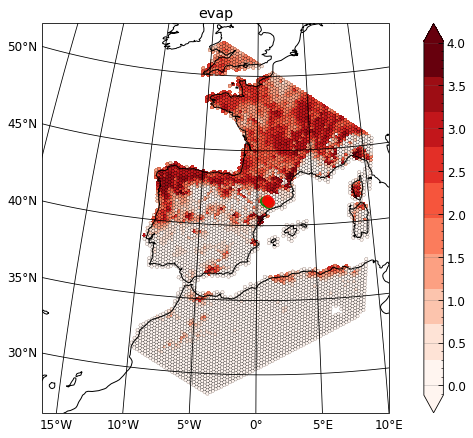

In [ ]:
file=orc_irr_1M_file
var='evap'

lat_min=41.35
lat_max=41.82
lon_min=0.45
lon_max=1.35

vmin=00.0
vmax=7000
cmap=reds
# (file, var, vmin, vmax, cmap)=(orc_irr_1M_file, 'irrigation', 0, 0.2, wet)

plot_ICO_from_netcdf(file, var, 
                     cmap=cmap,
                    #  lon_min=lon_min, lon_max=lon_max, lat_min=lat_min, lat_max=lat_max,
                    #  vmin=vmin, vmax=vmax, 
                    #  title='Irrigation (July 2021, mm/d)'
    )

ax = plt.gca()
ax.plot(Cendrosa_lon, Cendrosa_lat, 'go', markersize=10, transform=ccrs.Geodetic())
ax.plot(ElsPlans_lon, ElsPlans_lat, 'go', markersize=10, transform=ccrs.Geodetic())
ax.plot(Cendrosa_Longitude, Cendrosa_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())
ax.plot(ElsPlans_Longitude, ElsPlans_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())

# Time series

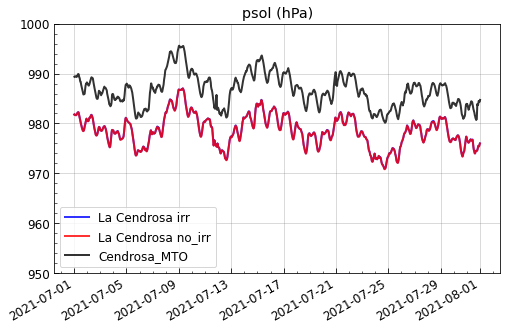

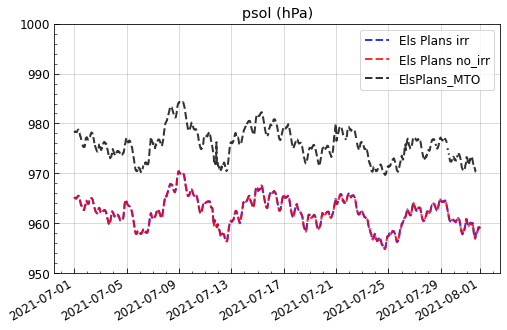

In [303]:
var='psol'
modorc=False
# timeslot='sop' 
timeslot='july'
if timeslot=='sop':
    if modorc:
        ds1=sop_cen_orc_irr
        ds2=sop_cen_orc_noirr
        ds3=sop_els_orc_irr
        ds4=sop_els_orc_noirr
        ds7=sop_cen_orc_noroughdyn
        ds8=sop_els_orc_noroughdyn
    else:
        ds2=sop_cen_lmdz_noirr
        ds1=sop_cen_lmdz_irr
        ds3=sop_els_lmdz_irr
        ds4=sop_els_lmdz_noirr
        ds7=sop_cen_lmdz_noroughdyn
        ds8=sop_els_lmdz_noroughdyn
    ds5=sop_cen_mto
    ds6=sop_els_mto
elif timeslot=='july':
    if modorc:
        ds1=cen_orc_irr
        ds2=cen_orc_noirr
        ds3=els_orc_irr
        ds4=els_orc_noirr
        ds7=cen_orc_noroughdyn
        ds8=els_orc_noroughdyn
    else:
        ds2=cen_lmdz_noirr
        ds1=cen_lmdz_irr
        ds3=els_lmdz_irr
        ds4=els_lmdz_noirr
        ds7=cen_lmdz_noroughdyn
        ds8=els_lmdz_noroughdyn
    ds5=cen_mto
    ds6=els_mto

# ds_list=[ds1, ds2]
ds_list=[ds1, ds2, ds5]#, ds7]
# ds_list=[ds1, ds2, ds3, ds4, ds5, ds6]

vmin=950
vmax=1000
# vmin, vmax=None, None
# title='{} ({})'.format(var, ds1[var].attrs['units'])
title=None

time_series_ave(ds_list, var, ds_colors=True, 
                # ds_linestyle=True, 
                title=title, vmin=vmin, vmax=vmax)

# vmin, vmax=None, None
# ds_list=[ds3, ds4]
ds_list=[ds3, ds4, ds6]#, ds8]
# ds_list=[ds4, ds8]
time_series_ave(ds_list, var, ds_colors=True, ds_linestyle=True, title=title, vmin=vmin, vmax=vmax)

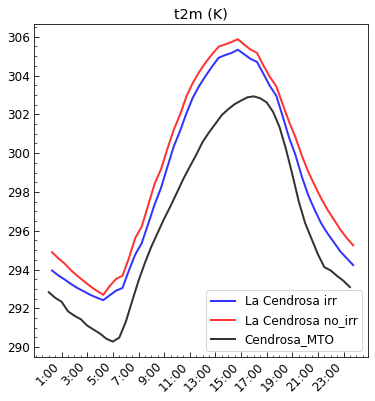

In [256]:
#diurnal cycles
var='t2m'
modorc=False
# timeslot='sop'
timeslot='july'
if timeslot=='sop':
    if modorc:
        ds1=sop_cen_orc_irr
        ds2=sop_cen_orc_noirr
        ds3=sop_els_orc_irr
        ds4=sop_els_orc_noirr
    else:
        ds2=sop_cen_lmdz_noirr
        ds1=sop_cen_lmdz_irr
        ds3=sop_els_lmdz_irr
        ds4=sop_els_lmdz_noirr
    ds5=sop_cen_mto
    ds6=sop_els_mto
elif timeslot=='july':
    if modorc:
        ds1=cen_orc_irr
        ds2=cen_orc_noirr
        ds3=els_orc_irr
        ds4=els_orc_noirr
        # ds7=cen_orc_noroughdyn
        # ds8=els_orc_noroughdyn
    else:
        ds2=cen_lmdz_noirr
        ds1=cen_lmdz_irr
        ds3=els_lmdz_irr
        ds4=els_lmdz_noirr
        # ds7=cen_lmdz_noroughdyn
        # ds8=els_lmdz_noroughdyn
    ds5=cen_mto
    ds6=els_mto

ds_list=[ds1, ds2, ds5]#, ds7]
# ds_list=[ds1, ds2, ds3, ds4, ds5, ds6]
# ds_list=[ ds2, ds7]

vmin=6.5
vmax=12
vmin, vmax=None, None
title='{} ({})'.format(var, ds1[var].attrs['units'])
# title='Soil temperature 6cm (°C)'

diurnal_cycle_ave(ds_list, var, ds_colors=True, 
                # ds_linestyle=True, 
                title=title, 
                vmin=vmin, vmax=vmax
                )

# vmin, vmax=None, None
# ds_list=[ds3, ds4, ds6]#, ds8]
# # ds_list=[ds4, ds8]
# diurnal_cycle_ave(ds_list, var, ds_colors=True, title=title, 
#                 #   ds_linestyle=True,
#                   vmin=vmin, vmax=vmax
#                   )   

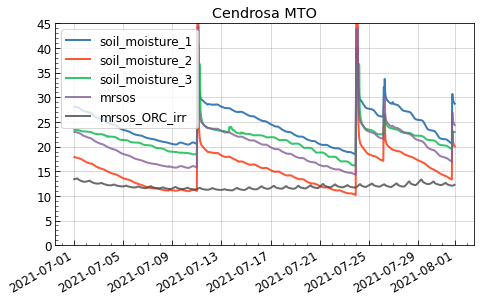

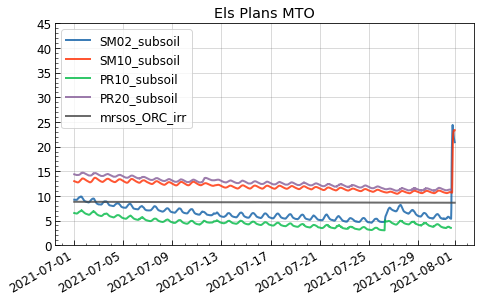

In [ ]:
#plot similar vars in obs to see how they compare
vmin=0
vmax=45
ds=cen_mto
vars=['soil_moisture_1','soil_moisture_2','soil_moisture_3', 'mrsos']
# vars=['mrsos','precip']
plotvars=[ds[var] for var in vars]+[cen_orc_irr['mrsos']]
labels=vars + ['mrsos_ORC_irr']
time_series(plotvars, labels, title='Cendrosa MTO', vmin=vmin, vmax=vmax)

ds=els_mto
vars=['SM02_subsoil','SM10_subsoil','PR10_subsoil','PR20_subsoil']
plotvars=[ds[var] for var in vars]+[els_orc_irr['mrsos']]
labels=vars+ ['mrsos_ORC_irr']
time_series(plotvars, labels, title='Els Plans MTO', vmin=vmin, vmax=vmax)

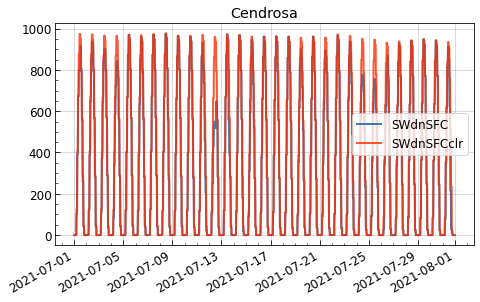

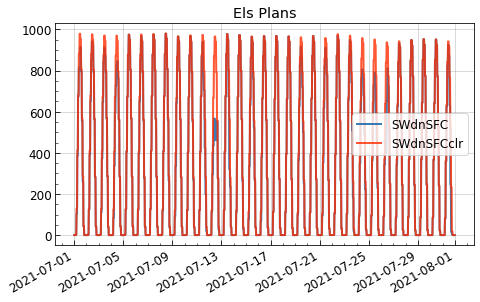

In [ ]:
#plot similar vars in sim to see how they compare
vars=['SWdnSFC','SWdnSFCclr']
# vars=['SWupSFC','SWupSFCclr']
labels=vars
vmin, vmax=None, None
# vmin=0
# vmax=75

ds=cen_lmdz_irr
plotvars=[ds[var] for var in vars]
# plotvars=[-ds['SWdnSFC']+ds['SWdnSFCclr']]
# labels=['SWdn_clr - SWdn']
time_series(plotvars, labels, title='Cendrosa', vmin=vmin, vmax=vmax)

ds=els_lmdz_irr
plotvars=[ds[var] for var in vars]
# plotvars=[-ds['SWdnSFC']+ds['SWdnSFCclr']]
time_series(plotvars, labels, title='Els Plans', vmin=vmin, vmax=vmax)

# Vertical profiles

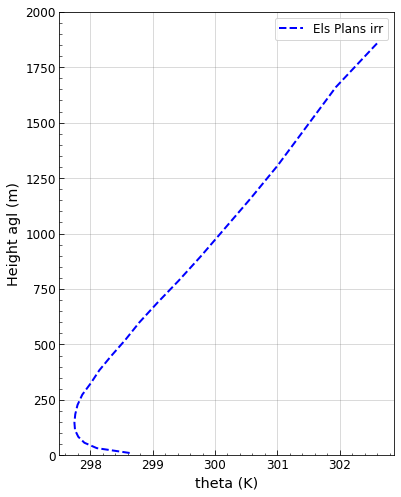

In [269]:
var='theta'
ds1=iop_els_lmdz_irr['1507']
ds2=iop_els_lmdz_noirr['1507']
ds3=iop_cen_lmdz_irr['1507']
ds4=iop_cen_lmdz_noirr['1507']

ds_list=[ds1, ds2, ds3, ds4]
# ds_list=[ds3, ds4]
ds_list=[ds1]
# ds_list=[cen_lmdz_irr]

# obs_ds_list=[Cendrosa_RS]
obs_ds_list=None

altmax=2000
title=None

# profile_preslevs_local(ds_list, var, title=title, preslevelmax=preslevelmax)
profile_altitude_local_mean(ds_list, var, title=title, altmax=altmax,
                            obs_ds_list=obs_ds_list,
                            nbins=None,
                            substract_gl=True,
                            )

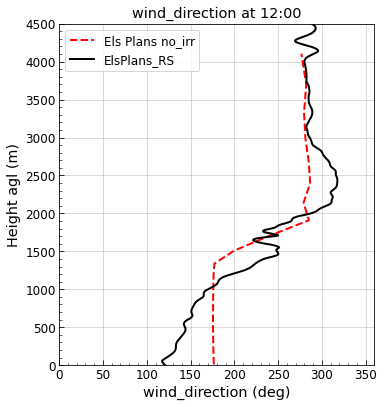

In [297]:
day='2007'
ds1=iop_els_lmdz_irr[day]
ds2=iop_els_lmdz_noirr[day]
ds3=iop_cen_lmdz_irr[day]
ds4=iop_cen_lmdz_noirr[day]

# times=[5.25,9.25,13.25, 17.25]
times=[12.25]

var='theta'
# var, xmin, xmax = 'theta', 300, 320
# var, xmin, xmax = 'ovap', 0, 14
# var, xmin, xmax = 'wind_speed', 0, 12
var, xmin, xmax = 'wind_direction', 0, 360
# xmin, xmax = None, None
altmax=4500
title=None

# ds_list, obs_dict=[iop_cen_lmdz_irr[day], iop_cen_lmdz_noirr[day]], cen_RS[day]
# profile_altitude_multipletimes_obs(ds_list, obs_dict, var, times, 
#                                  # title=title, 
#                                  altmax=altmax, xmin=xmin, xmax=xmax, 
#                                  # nbins=5,
#                                  substract_gl=True,
#                                  simfreq='30mn'
#                                 )

ds_list, obs_dict=[iop_els_lmdz_irr[day], iop_els_lmdz_noirr[day]], els_RS[day]
ds_list, obs_dict=[iop_els_lmdz_noirr[day]], els_RS[day]
profile_altitude_multipletimes_obs(ds_list, obs_dict, var, times, 
                                 # title=title, 
                                 altmax=altmax, xmin=xmin, xmax=xmax, 
                                 # nbins=5,
                                 substract_gl=True,
                                 simfreq='30mn'
                                )

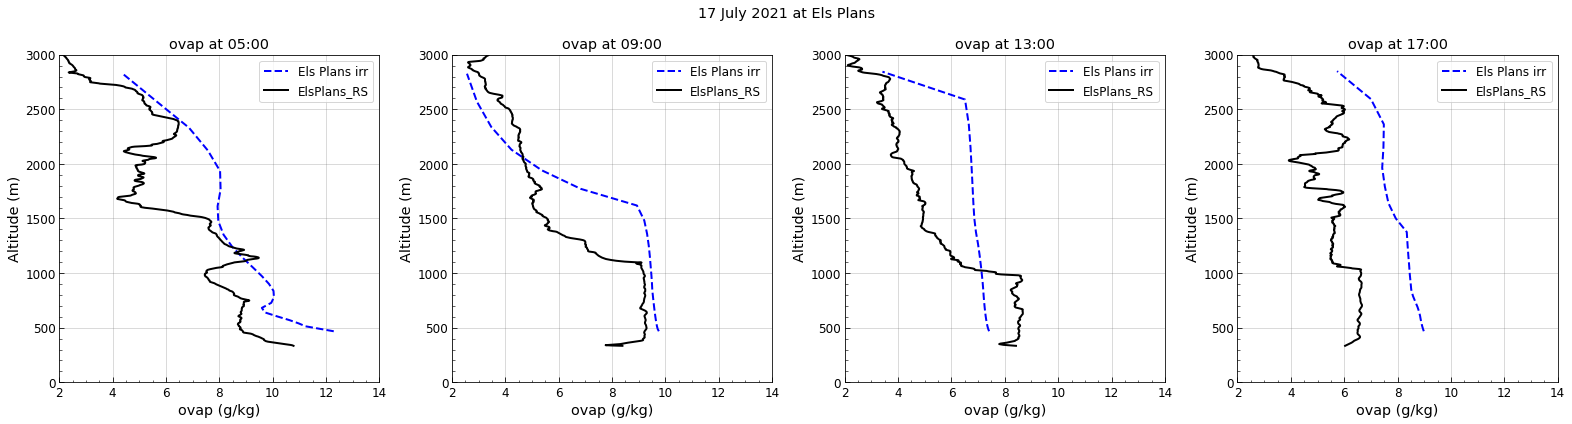

In [ ]:
times=[5.25,9.25,13.25, 17.25]

# var='theta'
var, xmin, xmax = 'theta', 290, 314
var, xmin, xmax = 'ovap', 2, 14
# var, xmin, xmax = 'wind_speed', 0, 10
# var, xmin, xmax = 'wind_direction', 0, 360
# xmin, xmax = None, None
altmax=3000
daylist=['1707']

for day in daylist:
# for day in RS_days_list:
    title=nice_day_print[day]
    ds_list, obs_dict=[iop_cen_lmdz_irr[day], iop_cen_lmdz_noirr[day]], cen_RS[day]
    profile_altitude_multipletimes_obs(ds_list, obs_dict, var, ([6.25,9.25,13.25, 17.25] if day=='1507' else times), 
                                    altmax=altmax, xmin=xmin, xmax=xmax, 
                                    # nbins=5,
                                    substract_gl=True,
                                    # substract_gl=False,
                                    # altsite=Cendrosa_altitude,
                                    simfreq='30mn', 
                                    title='{} at La Cendrosa'.format(title)
                                    )
    fig_name='figures/rs_iop_liaise/rs_{}_Cendrosa_{}'.format(var,day)
    # fig_name='figures/rs_alt_iop_liaise/rs_{}_Cendrosa_{}'.format(var,day)
    plt.savefig(fig_name)

for day in daylist:
# for day in RS_days_list:
    title=nice_day_print[day]
    # ds_list, obs_dict=[iop_els_lmdz_irr[day], iop_els_lmdz_noirr[day]], els_RS[day]
    ds_list, obs_dict=[iop_els_lmdz_irr[day]], els_RS[day]
    profile_altitude_multipletimes_obs(ds_list, obs_dict, var, times, 
                                    altmax=altmax, xmin=xmin, xmax=xmax, 
                                    # nbins=5,
                                    substract_gl=True,
                                    # substract_gl=False,
                                    # altsite=ElsPlans_altitude,
                                    simfreq='30mn',
                                    title='{} at Els Plans'.format(title)
                                    )
    fig_name='figures/rs_iop_liaise/rs_{}_ElsPlans_{}'.format(var,day)
    # fig_name='figures/rs_iop_liaise/rs_alt_{}_ElsPlans_{}'.format(var,day)
    plt.savefig(fig_name)

# Site caracterization

In [257]:
cen_orc_irr_1M=sel_closest(orc_irr_1M, Cendrosa_lon, Cendrosa_lat)
cen_orc_noirr_1M=sel_closest(orc_noirr_1M, Cendrosa_lon, Cendrosa_lat)
els_orc_irr_1M=sel_closest(orc_irr_1M, ElsPlans_lon, ElsPlans_lat)
els_orc_noirr_1M=sel_closest(orc_noirr_1M, ElsPlans_lon, ElsPlans_lat)

#rename ds according to site and irr
cen_orc_irr_1M.attrs['name']='La Cendrosa irr'
cen_orc_noirr_1M.attrs['name']='La Cendrosa no_irr'
els_orc_irr_1M.attrs['name']='Els Plans irr'
els_orc_noirr_1M.attrs['name']='Els Plans no_irr'

cen_orc_irr_1M

<xarray.Dataset>
Dimensions:                 (nvertex: 6, veget: 15, soiltyp: 3, solth: 18,
                             nobio: 1, solay: 11, snowlev: 3, albtyp: 2,
                             time: 1, axis_nbounds: 2)
Coordinates:
    lat                     float32 dask.array<chunksize=(), meta=np.ndarray>
    lon                     float32 dask.array<chunksize=(), meta=np.ndarray>
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2021-07-16T12:00:00
    time_decimal            (time) float64 12.0
Dimensions without coordinates: nvertex, axis_nbounds
Data variables: (12/137)
    bounds_lon              (nvertex) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    bounds_lat              (nvertex) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   float32 dask.array<chunksize=(), meta=np.ndarray>
    Contfrac                float32 dask.array<chunksize=(), meta=np.ndarray>
    ...                      ...
    soilalb_bg              (albtyp) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    soil_temp_01            (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    soil_temp_03            (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    soil_temp_06            (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    soil_temp_12            (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    irrig_frac              (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    name:         La Cendrosa irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-12 15:56:45 GMT
    uuid:         5c6364b1-3dbe-4c4d-8670-67f9d0d277d0
    plot_color:   blue

In [258]:
cen_lmdz_irr_1M=sel_closest(lmdz_irr_1M, Cendrosa_lon, Cendrosa_lat)
cen_lmdz_noirr_1M=sel_closest(lmdz_noirr_1M, Cendrosa_lon, Cendrosa_lat)
els_lmdz_irr_1M=sel_closest(lmdz_irr_1M, ElsPlans_lon, ElsPlans_lat)
els_lmdz_noirr_1M=sel_closest(lmdz_noirr_1M, ElsPlans_lon, ElsPlans_lat)

#rename ds according to site and irr
cen_lmdz_irr_1M.attrs['name']='La Cendrosa irr'
cen_lmdz_noirr_1M.attrs['name']='La Cendrosa no_irr'
els_lmdz_irr_1M.attrs['name']='Els Plans irr'
els_lmdz_noirr_1M.attrs['name']='Els Plans no_irr'

cen_lmdz_irr_1M

<xarray.Dataset>
Dimensions:               (nvertex: 6, presnivs: 79, time: 1, axis_nbounds: 2)
Coordinates:
    lat                   float32 dask.array<chunksize=(), meta=np.ndarray>
    lon                   float32 dask.array<chunksize=(), meta=np.ndarray>
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2021-07-16T12:00:00
    time_instant          (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_decimal          (time) float64 12.0
Dimensions without coordinates: nvertex, axis_nbounds
Data variables: (12/89)
    bounds_lon            (nvertex) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    bounds_lat            (nvertex) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    phis                  (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                    ...
    wind_speed            (time, presnivs) float32 dask.array<chunksize=(1, 79), meta=np.ndarray>
    wind_direction        (time, presnivs) float32 dask.array<chunksize=(1, 79), meta=np.ndarray>
    wind_speed_10m        (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wind_direction_10m    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    pressure              (time, presnivs) float32 1.012e+05 1.009e+05 ... 1.483
    rh                    (time, presnivs) float32 dask.array<chunksize=(1, 79), meta=np.ndarray>
Attributes:
    name:         La Cendrosa irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-12 16:27:07 GMT
    uuid:         ba23defc-9b60-4dff-961d-b6cee8d2ead6
    plot_color:   blue

In [259]:
def process_list(input_list):
    print( [round(x * 100, 1) for x in input_list])

In [260]:
process_list(cen_orc_irr_1M['soiltile'].values)
process_list(cen_orc_irr_1M['maxvegetfrac'].values[0])
process_list(cen_orc_irr_1M['vegetfrac'].values[0])

[4.1, 12.4, 83.5]
[4.1, 0.0, 0.0, 0.0, 0.0, 12.4, 0.0, 0.0, 0.0, 8.1, 0.9, 70.4, 4.2, 0.0, 0.0]
[4.1, 0.0, 0.0, 0.0, 0.0, 4.8, 0.0, 0.0, 0.0, 0.6, 0.6, 33.3, 4.0, 0.0, 0.0]


In [261]:
process_list(els_orc_irr_1M['soiltile'].values)
process_list(els_orc_irr_1M['maxvegetfrac'].values[0])
process_list(els_orc_irr_1M['vegetfrac'].values[0])

[1.6, 28.2, 70.2]
[1.6, 0.0, 0.0, 3.0, 2.9, 22.3, 0.0, 0.0, 0.0, 10.7, 0.4, 55.7, 3.4, 0.0, 0.0]
[1.6, 0.0, 0.0, 0.1, 0.4, 8.5, 0.0, 0.0, 0.0, 0.6, 0.0, 5.7, 0.0, 0.0, 0.0]


In [262]:
def round_value(val):
    if isinstance(val, xr.DataArray):
        return round(float(val.values), 1)
    elif isinstance(val, (int, float)):
        return round(val, 2)
    return val

In [263]:
orc_varlist=['tot_bare_soil', 'LAImean', 'albedo_glob',
             'irrig_frac', 'aei_sw', 'root_deficit', 'netirrig','irrigation',
             'mrsos', 'temp_sol', 'rain']
orc_ds_list=[cen_orc_irr_1M, els_orc_irr_1M]

rows = []
for ds in orc_ds_list:
    row_data = {}
    for var in orc_varlist:
        row_data[var] = ds[var].values[0]
    rows.append(row_data)

df = pd.DataFrame(rows)
df=df.round(2)
df.index = [ds.attrs['name'] for ds in orc_ds_list]

df

tot_bare_soil  LAImean  albedo_glob  irrig_frac  aei_sw  \
La Cendrosa irr           0.57     0.66         0.17       66.57    0.76   
Els Plans irr             0.85     0.18         0.13       19.41    0.51   

                 root_deficit  netirrig  irrigation  mrsos   temp_sol  rain  
La Cendrosa irr          0.50     31.99        1.98  11.91  28.150000   0.0  
Els Plans irr            0.93      6.76        0.00   8.69  28.799999   0.0

In [264]:
lmdz_varlist=['ground_level','psol','t2m','flat', 'sens',
               'SWdnSFC', 'LWdnSFC', 'SWupSFC', 'LWupSFC']
lmdz_ds_list=[cen_lmdz_irr_1M, els_lmdz_irr_1M]

rows = []
for ds in lmdz_ds_list:
    row_data = {}
    for var in lmdz_varlist:
        row_data[var] = round(ds[var].values[0],1)
        # print (var, row_data[var])
    rows.append(row_data)

df = pd.DataFrame(rows)
df = df.map(round_value)
df.index = [ds.attrs['name'] for ds in lmdz_ds_list]

df

ground_level   psol    t2m  flat   sens  SWdnSFC  LWdnSFC  \
La Cendrosa irr         307.6  978.6  298.4  62.8   93.0    330.2    356.1   
Els Plans irr           456.9  962.2  297.4   2.1  153.4    330.8    348.9   

                 SWupSFC  LWupSFC  
La Cendrosa irr     55.3    470.0  
Els Plans irr       43.9    474.2

In [265]:
ds=els_lmdz_noirr_1M
# ds=day2_els_lmdz_irr
(ds['geoph']- ds['ground_level']).values

array([[1.0524200e+01, 3.2454559e+01, 5.6897308e+01, 8.4146393e+01,
        1.1452420e+02, 1.4839059e+02, 1.8614694e+02, 2.2823880e+02,
        2.7516122e+02, 3.2746548e+02, 3.8576602e+02, 4.5074625e+02,
        5.2316248e+02, 6.0385181e+02, 6.9373767e+02, 7.9383386e+02,
        9.0524915e+02, 1.0291938e+03, 1.1669847e+03, 1.3200413e+03,
        1.4898877e+03, 1.6781711e+03, 1.8866592e+03, 2.1172344e+03,
        2.3719204e+03, 2.6528491e+03, 2.9622227e+03, 3.3022686e+03,
        3.6751367e+03, 4.0827744e+03, 4.5266807e+03, 5.0078281e+03,
        5.5267148e+03, 6.0831182e+03, 6.6759224e+03, 7.3033081e+03,
        7.9628262e+03, 8.6514082e+03, 9.3663320e+03, 1.0105878e+04,
        1.0869682e+04, 1.1659196e+04, 1.2475378e+04, 1.3315005e+04,
        1.4172597e+04, 1.5044817e+04, 1.5930607e+04, 1.6830891e+04,
        1.7746529e+04, 1.8677393e+04, 1.9624779e+04, 2.0589564e+04,
        2.1572678e+04, 2.2575076e+04, 2.3596475e+04, 2.4638643e+04,
        2.5703896e+04, 2.6794059e+04, 2.7913010e